# Lecture 18: Partial Differential Equations - Parabolic ⏱️

## Temperature in a 1-D Metal Rod

$$\frac{\partial T}{\partial t} = k\frac{\partial^2 T}{\partial x^2}$$

$x \in [0,10]$ cm, $t \in [0,50]$ seconds. Use $\Delta x = 0.2$ cm and $\Delta t = 0.01$ s.

Boundary conditions: $T(0,t) = 100$°C, $T(10,t) = 50$°C

Initial condition: $T(x,0) = 0$°C

- Solve with explicit (FTCS), implicit (BTCS), and Crank-Nicolson
- Compare accuracy against analytical solution: $T(x=2, t=10) = 64.8018$ (C&C Table 30.1)

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

### 1. Explicit FTCS Method

FTCS PDE:
$$T_i^{l+1}=T_i^l+\lambda \big( T^l_{i+1} - 2T_i^l + T^l_{i-1} \big)$$

where:
$$\lambda = \frac{k \Delta t}{(\Delta x)^2}$$

💪 Implement the Explicit FTCS Method

In [ ]:
# Define Parameters
dx = 0.2 # cm [Original Value: dx = 0.2]
dt = 0.01 # s [Original Value: dt = 0.01]
L = 10 # cm
tmax = 50 # s
k = 0.835 # cm^2/s

lmbda  =  #[insert code here]
          # Note: lambda is a reserved keyword in python

# Initialize Arrays / Solution Matrix
x = np.arange(0, L+dx, dx)
t = np.arange(0, tmax+dt, dt)

T  = #[insert code here]

# Boundary Conditions
#[insert code here]

# Explicit FTCS Method
for l in range(len(t)):
    for i in range(1,len(x)-1):   # i=0 and i=len(x)-1 are BCs
        #[insert code here]

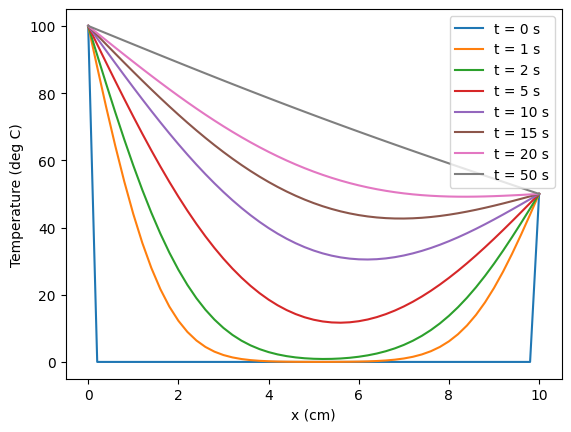

In [ ]:
# Plot Temperature Profiles at Selected Times
times_to_plot = [0, 1, 2, 5, 10, 15, 20, 50] # seconds

for ttp in times_to_plot:
    plt.plot(x, T[:, int(ttp/dt)], label = 't = %d s' % ttp)

plt.xlabel('x (cm)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

❓ Is this solution stable?

In [ ]:
print(lmbda)

0.20874999999999996


* The value $\lambda \leq 1/2$, so the explicit solution is stable.

❓ What happens if we increase $\Delta t = 0.1$ s?

* The value of $\lambda$ is now $> 1/2$, so the explicit solution is unstable.
* This can be observed by the oscillanting behavior of the plot.

In [ ]:
T_explicit = T.copy() # Save the results for later
                      # Make sure the revise dx = 0.2, dt = 0.01

---
## 2. Implicit (BTCS) method

BTCS PDE:
$$-\lambda T_{i-1}^{l+1} + \big( 1+2\lambda \big) T^{l+1}_{i} - \lambda T^{l+1}_{i+1}=T^l_i$$

💪 Implement the Implicit BTCS Method

In [ ]:
T  = np.zeros((len(x),len(t)+1))

# Boundary Conditions
T[:,0] = 0 # initial condition
T[0,:] = 100 # left BC
T[-1,:] = 50  # right BC

# Discretize Domain to Solve System of Equations
main = #[insert code here]
off1 = #[insert code here]
A = #[insert code here]

# Implicit BTCS Method
# Loop over timesteps and solve system of equations
for l in range(len(t)):
    # b vector is the previous timestep temperatures plus BCs
    b = #[insert code here] # internal nodes only
    b[0] #[insert code here] # left BC
    b[-1] #[insert code here] # right BC

    #[insert code here] # solve all internal nodes at this timestep


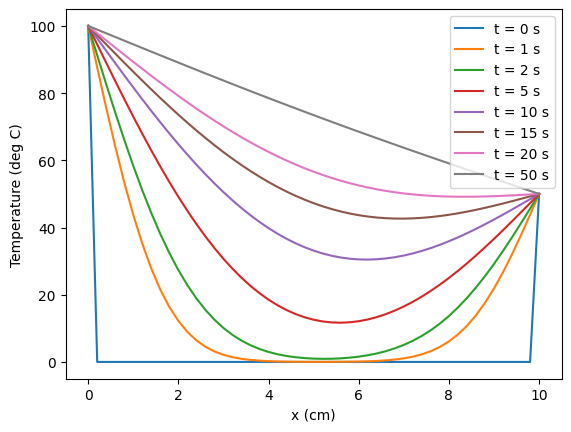

In [ ]:
# Plot Temperature Profiles at Selected Times
times_to_plot = [0, 1, 2, 5, 10, 15, 20, 50] # seconds

for ttp in times_to_plot:
    plt.plot(x, T[:, int(ttp/dt)], label = 't = %d s' % ttp)

plt.xlabel('x (cm)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

The solution looks about the same. The advantage of the BTCS method would be if we wanted to use a larger $\Delta t$ to improve efficiency because it is unconditionally stable.

In [ ]:
T_implicit = T.copy() # save the results for later

---
## 3. Crank-Nicolson Method

The setup is similar to the BTCS method, it is just a bit more involved to create the $\mathbf{b}$ vector each timestep.

Crank-Nicolson PDE:
$$
-\lambda T^{l+1}_{i-1}+2\big( 1 + \lambda \big)T^{l+1}_{i} - \lambda T^{l+1}_{i+1} = 2\big( 1 - \lambda \big)T^{l}_{i} + \lambda T^{l}_{i+1}
$$



🤝 Implement the Crank-Nicolson Method

In [ ]:
T  = np.zeros((len(x),len(t)+1))

# Boundary Conditions
T[:,0] = 0 # initial condition
T[0,:] = 100 # left BC
T[-1,:] = 50  # right BC

# LHS matrix A
main = 2*(1 + lmbda) * np.ones(len(x)-2) # length-2 removes BCs
off1 = -lmbda * np.ones(len(x)-3)
A = np.diag(main) + np.diag(off1,-1) + np.diag(off1,1)

# RHS matrix is also constant (call it M)
main = 2*(1 - lmbda) * np.ones(len(x)-2)
off1 = lmbda * np.ones(len(x)-3)
M = np.diag(main) + np.diag(off1,-1) + np.diag(off1,1)

for l in range(len(t)):
    # b vector M * T^l plus BCs
    b = M @ T[1:-1,l].copy() # internal nodes only
    b[0] += 2 * lmbda * 100 # left BC
    b[-1] += 2 * lmbda*50 # right BC

    T[1:-1,l+1] = np.linalg.solve(A,b) # solve all internal nodes at this timestep

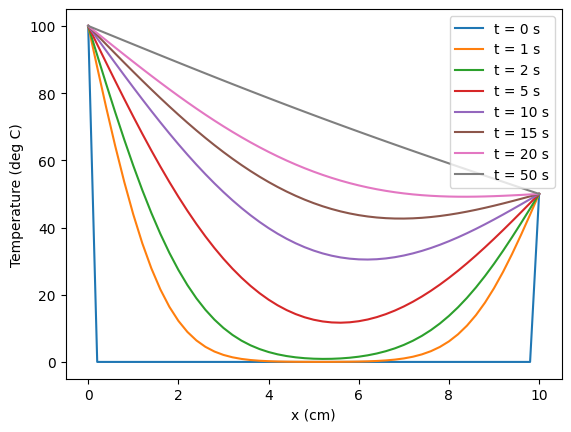

In [ ]:
for ttp in times_to_plot:
    plt.plot(x, T[:, int(ttp/dt)], label = 't = %d s' % ttp)

plt.xlabel('x (cm)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [ ]:
T_cn = T.copy()

---
## Comparing Accuracy

Compare accuracy to analytical value: $T(x=2, t=10) = 64.8018$

In [ ]:
exact = 64.8018

# percent relative error
err_explicit = np.abs(T_explicit[int(2/dx), int(10/dt)] - exact) / exact * 100
err_implicit = np.abs(T_implicit[int(2/dx), int(10/dt)] - exact) / exact * 100
err_cn = np.abs(T_cn[int(2/dx), int(10/dt)] - exact) / exact * 100

print(f'Explicit: {err_explicit*100:0.4f}%')
print(f'Implicit: {err_implicit*100:0.4f}%')
print(f'Crank-Nicolson: {err_cn*100:0.4f}%')

Explicit: 1.7463%
Implicit: 1.9287%
Crank-Nicolson: 0.0903%


In this case we are using a small $\Delta t$, so all three methods are very accurate, though Crank-Nicolson is two orders of magnitude more accurate than the others. BTCS has essentially the same accuracy as FTCS, but with the advantage of unconditional stability (not shown here). Try testing the accuracy for different values of $\Delta t$, and compare to C&C Table 30.1.

<p align="center">
  <img src="https://github.com/cdefinnda/ECI-115_HW-Images/blob/main/Table_30.1.png?raw=true" alt="Table 30.1" width=700>
</p>

## Bonus: Animation

Since we have the full matrix `T(x,t)` saved, we can also try animating `T(x)` over time. First create the initial plot axes, then update the line every `interval` steps. Note this will only animate when the cell is run. There are more advanced methods to save and embed animations in static webpages, for example see [here](https://jckantor.github.io/CBE30338/A.03-Animation-in-Jupyter-Notebooks.html).

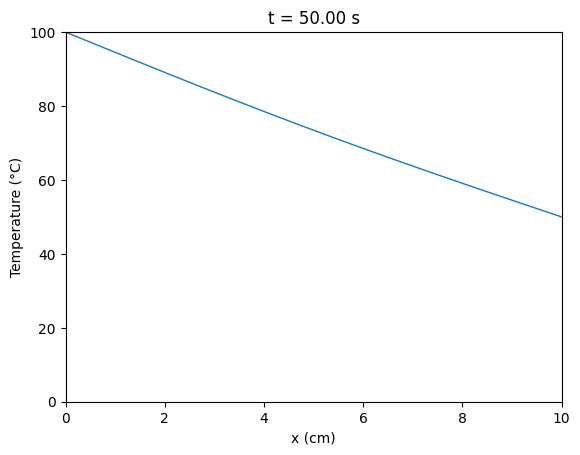

In [ ]:
from IPython import display

fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(0, 100))
h, = ax.plot(x, T[:,0], lw=1)
plt.xlabel('x (cm)')
plt.ylabel('Temperature (°C)')

interval = 20
for i in range(len(t)):
    if i % interval == 0:
        h.set_data(x, T[:,i])
        plt.title('t = %0.2f s' % (i*dt))
        display.display(plt.gcf())
        display.clear_output(wait =True)